In [456]:
%matplotlib inline
import cv2
import os
import glob
import subprocess
from matplotlib import pyplot as plt
import numpy as np
import time as t
import copy
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.0 


In [457]:
#os.chdir('E:/Tools/ffmpeg/ffmpeg-20170112-6596b34-win64-static/bin')
#subprocess.call(['ffmpeg', '-i', 'C:/Temp/imagetemp/fisheries/vids.mp4', '-r', '1/.25', 'C://Temp/imagetemp/fisheries/output/IMG_%03d.jpg'])


In [458]:
input_image = 'eyes.jpg'

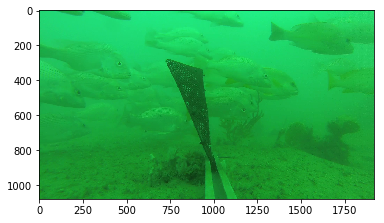

In [459]:
orig_img = cv2.imread(input_image)
gray_image = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
display_img = cv2.cvtColor(orig_img,cv2.COLOR_BGR2RGB)
plt.imshow(display_img)
plt.show()


In [460]:
fgbg = cv2.createBackgroundSubtractorMOG2()

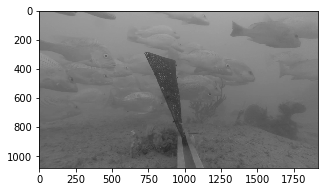

In [461]:

smoothedFrame = cv2.GaussianBlur(gray_image,(5,5),0)
plt.figure(figsize=(5, 5))
display_img = cv2.cvtColor(smoothedFrame,cv2.COLOR_GRAY2RGB)
plt.imshow(display_img)
plt.show()

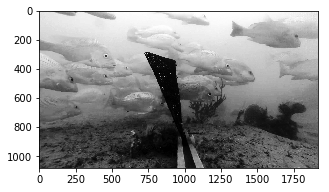

In [506]:
#lower = np.array([0, 0, 0], dtype = "uint8")

#rng = 170

#upper = np.array([rng, rng, rng], dtype = "uint8")

#mask = cv2.inRange(orig_img, lower, upper)
#inRange_img = cv2.bitwise_and(orig_img, orig_img, mask = mask)

equ = cv2.equalizeHist(gray_image)
#smooth_equ = cv2.GaussianBlur(equ,(9,9),0)
smooth_equ = cv2.medianBlur(equ, 3)
#ret, thresh = cv2.threshold(equ, 130, 255, 0)
display_img = cv2.cvtColor(smooth_equ,cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(5, 5))
plt.imshow(display_img)
plt.show()

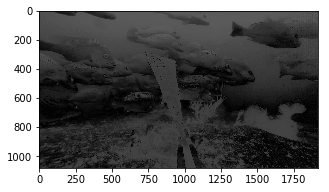

In [525]:
diff = cv2.absdiff(gray_image, equ)
display_img = cv2.cvtColor(diff,cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(5, 5))
plt.imshow(display_img)
plt.show()

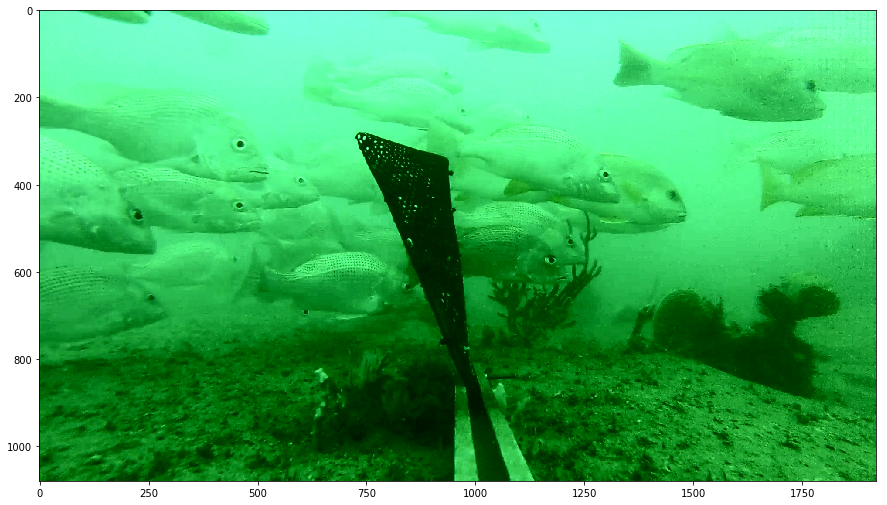

In [504]:
img_yuv = cv2.cvtColor(orig_img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

display_img = cv2.cvtColor(img_output,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(display_img)
plt.show()

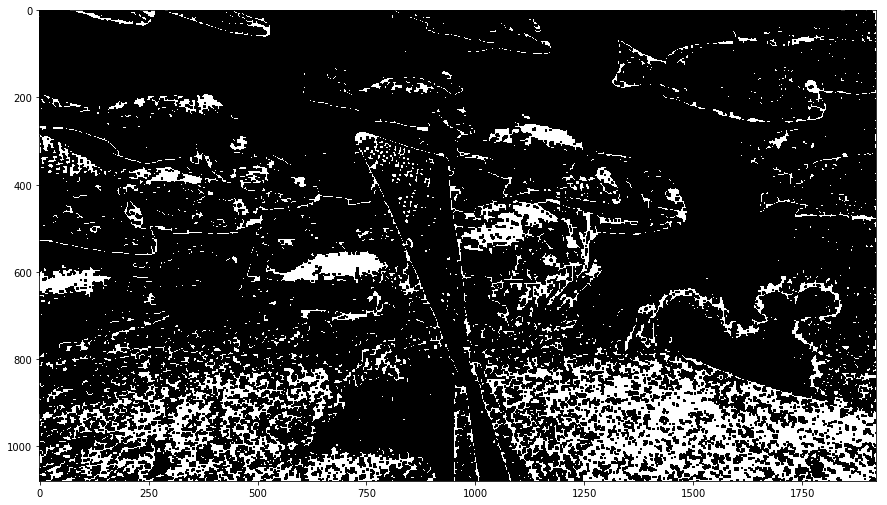

In [463]:
#frameDelta = cv2.absdiff(smoothedFrame, gray_image)
#img_thresh = cv2.threshold(frameDelta, 1, 255, 0)[1]

#kernel = np.ones((5,5), np.uint8)
#img_dilation = cv2.dilate(img_thresh, kernel, iterations=1)
#img_erode = cv2.erode(img_dilation, kernel, iterations=1)        

#contours = cv2.findContours(img_erode,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[1]
#cv2.drawContours(orig_img,contours,-1,(0,255,255),3)

param = 50

edged = cv2.Canny(smooth_equ, param, param+10)

it = 2
kern = 3
kernel = np.ones((kern,kern), np.uint8)
img_dilation = cv2.dilate(edged, kernel, iterations=it)
#kernel = np.ones((3,3), np.uint8)
img_erode = cv2.erode(img_dilation, kernel, iterations=it)    

display_img = cv2.cvtColor(img_erode,cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(display_img)
plt.show()

(732.0840454101562, 978.73388671875)
26.50763511657715


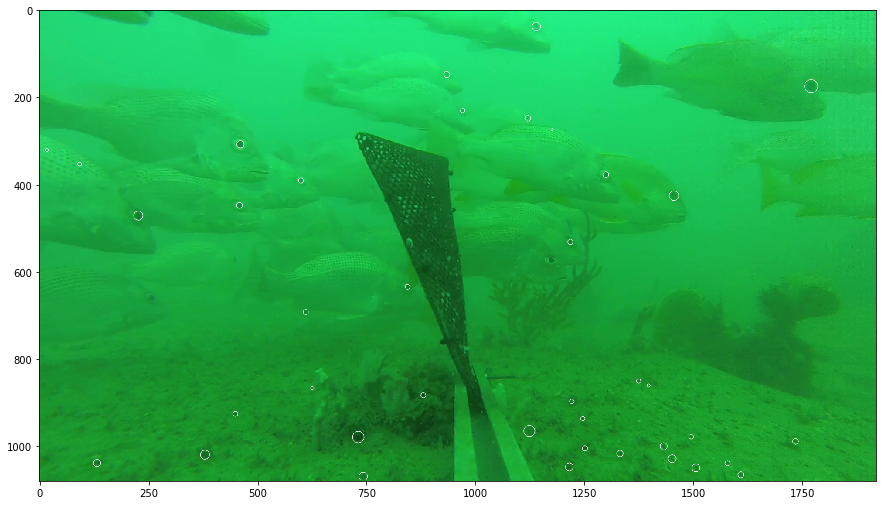

True

In [464]:
params = cv2.SimpleBlobDetector_Params()
     
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 255;

# Filter by Area.
params.filterByArea = True
params.minArea = 15

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = .8

# Filter by Inertia
params.filterByInertia =False
params.minInertiaRatio = 0.5

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(smoothedFrame)

kp = keypoints[0]
print(kp.pt)
print(kp.size)

im_with_keypoints = cv2.drawKeypoints(orig_img, keypoints, np.array([]), (255,255,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
display_img = cv2.cvtColor(im_with_keypoints,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(display_img)
plt.show()
cv2.imwrite("output1.jpg",im_with_keypoints )

(1455.9141845703125, 425.32391357421875)
22.026592254638672


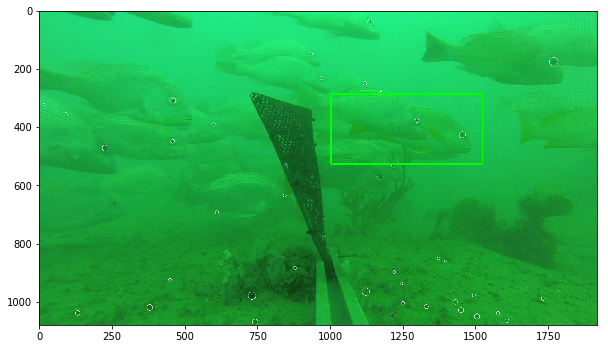

In [491]:
kp = keypoints[27]
print(kp.pt)
print(kp.size)


img_copy = copy.copy(im_with_keypoints)

w = 450
h = 100

y = int(kp.pt[1])
x = int(kp.pt[0])


square1 = [(x-w, y-140), (x+70, y+h)]


#crop_img = im_with_keypoints[y:y+h, x:x+w + 14]

cv2.rectangle(img_copy,square1[0],square1[1],(0,255,0),3)


display_img = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(display_img)
plt.show()

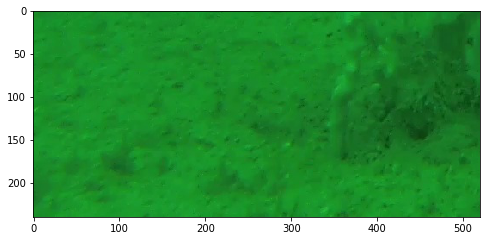

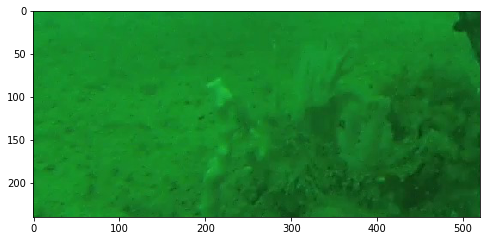

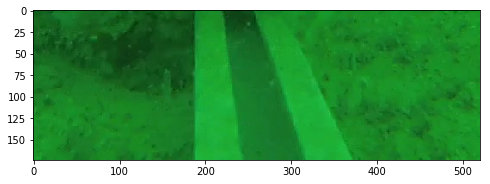

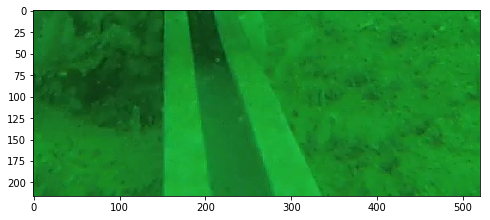

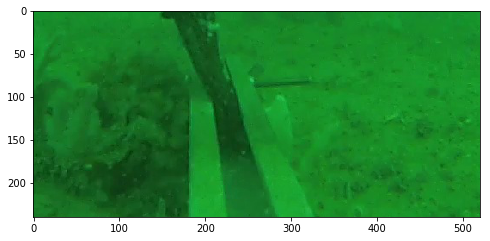

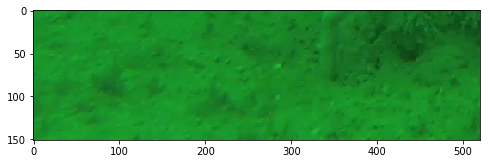

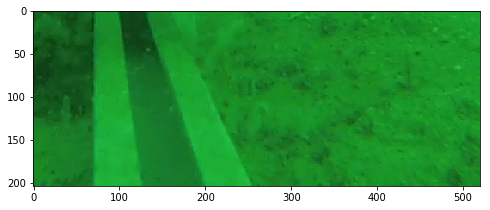

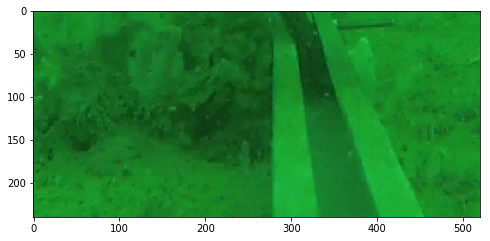

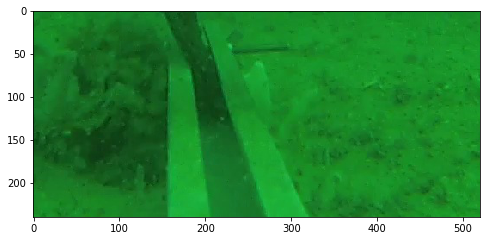

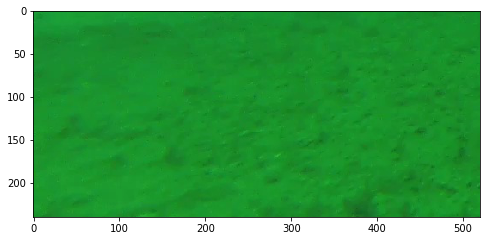

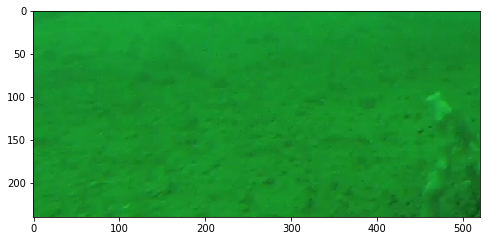

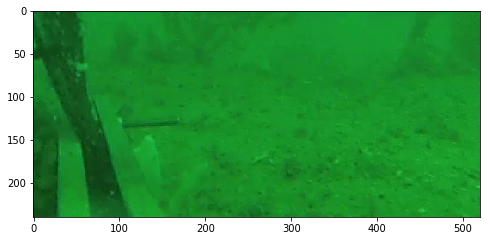

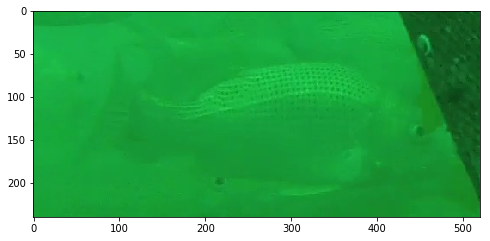

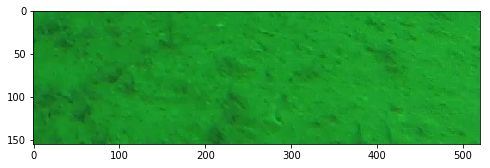

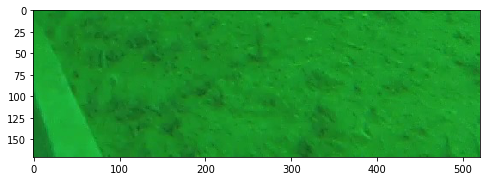

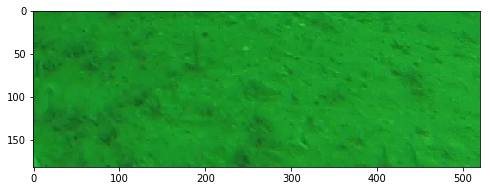

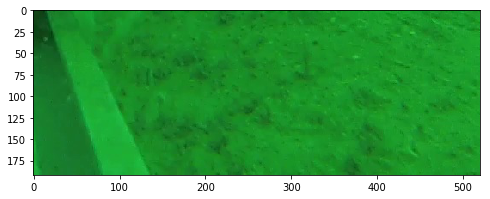

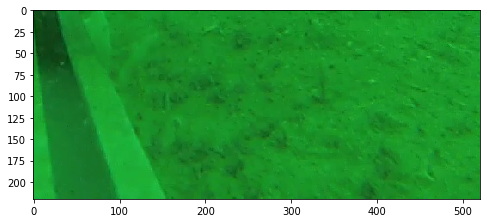

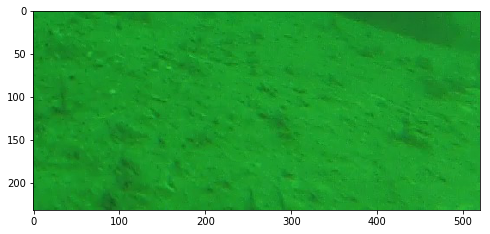

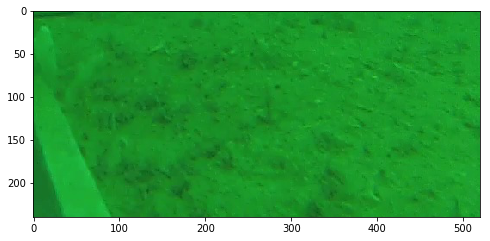

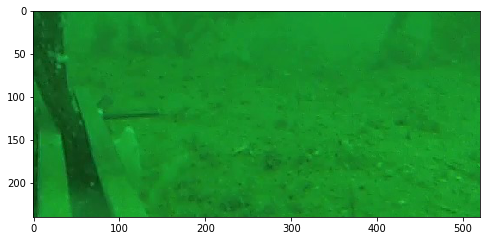

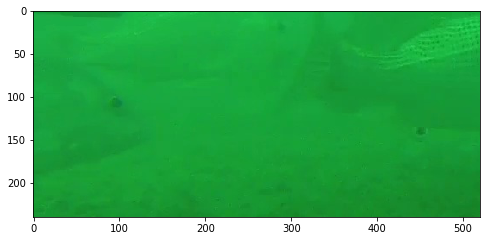

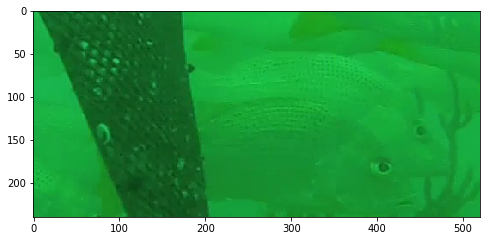

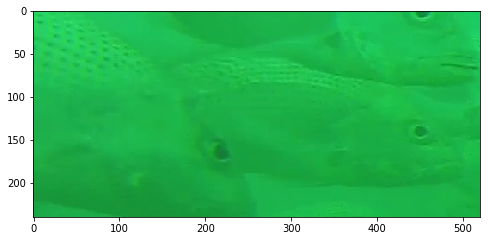

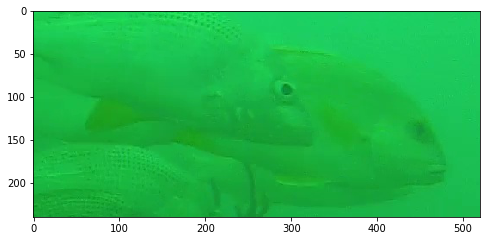

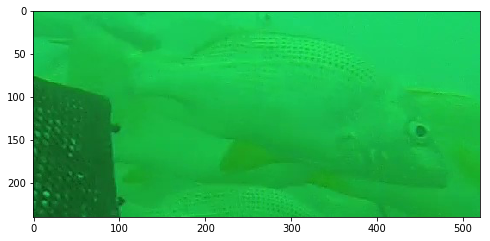

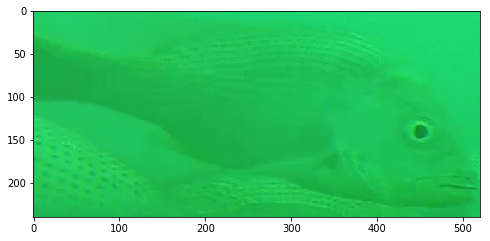

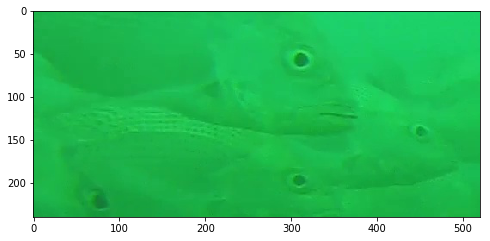

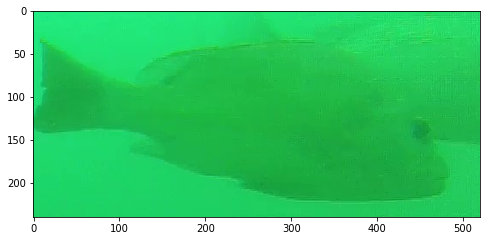

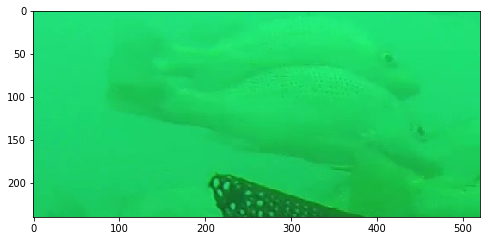

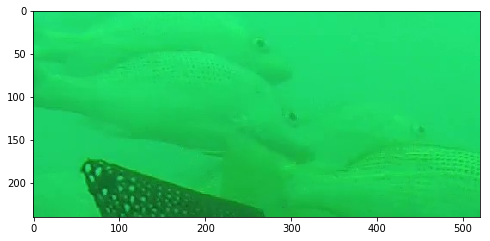

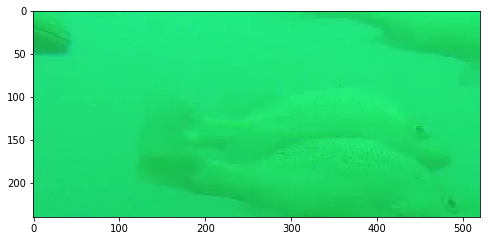

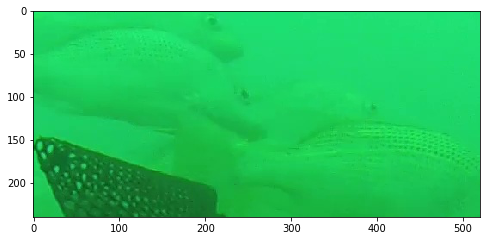

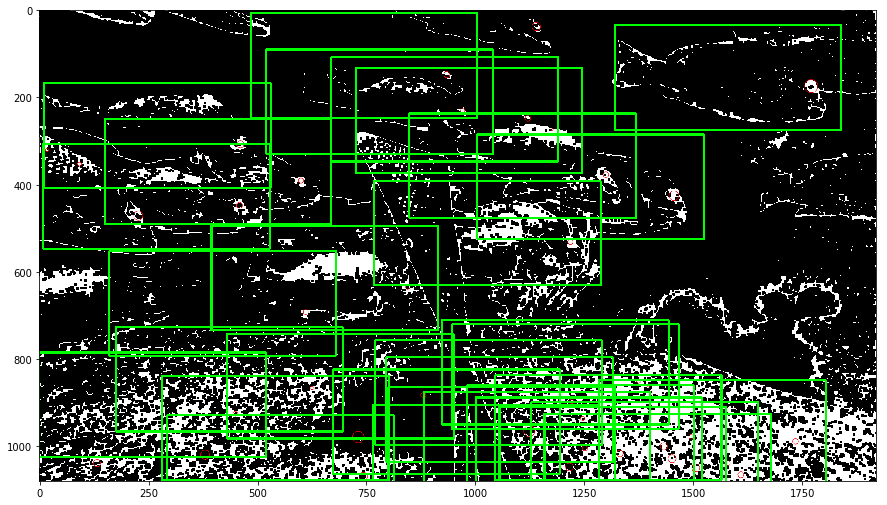

In [516]:
img_copy = copy.copy(im_with_keypoints)

counter = 0;

for i in range(0, len(keypoints)):
    counter = counter + 1;
    kp = keypoints[i]
 
    w = 450
    h = 100

    y = int(kp.pt[1])
    x = int(kp.pt[0])


    square1 = [(x-w, y-140), (x+70, y+h)]
    #print (square1)

    if(square1[0][0]<0):
        #print("BREAK")
        continue
    
    if(square1[0][1]<0):
        #print("BREAK")
        continue
    
    crop_img = orig_img[square1[0][1]:square1[1][1], square1[0][0]:square1[1][0]]

    cv2.rectangle(img_copy,square1[0],square1[1],(0,255,0),3)
   
    display_img = cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(display_img)
    plt.show()
    cv2.imwrite('C:/Temp/imagetemp/fish/extracted/img_' + str(counter) + '.jpg', crop_img)
    

    #crop_img = im_with_keypoints[y:y+h, x:x+w]  
display_img = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(display_img)
plt.show()
    
    





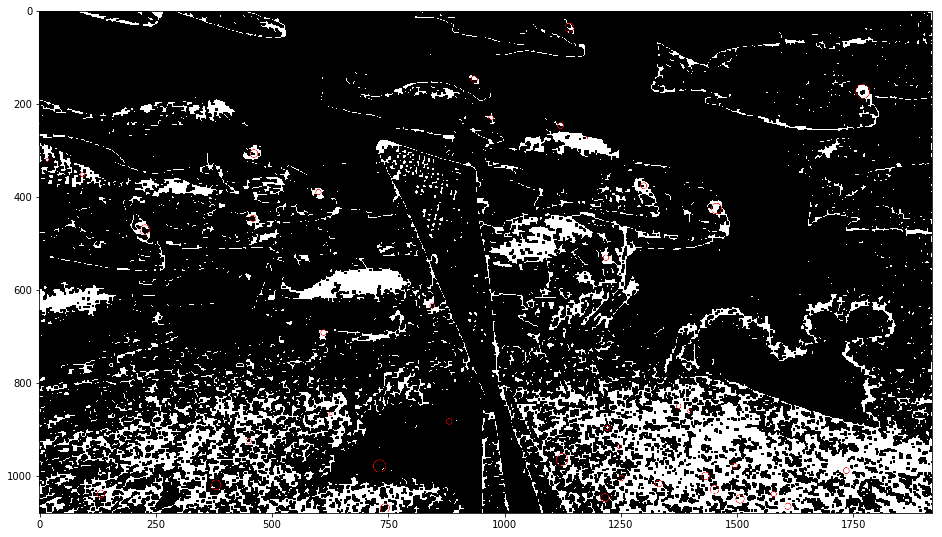

In [508]:
im_with_keypoints = cv2.drawKeypoints(img_erode, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
display_img = cv2.cvtColor(im_with_keypoints,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 16))
plt.imshow(display_img)
plt.show()

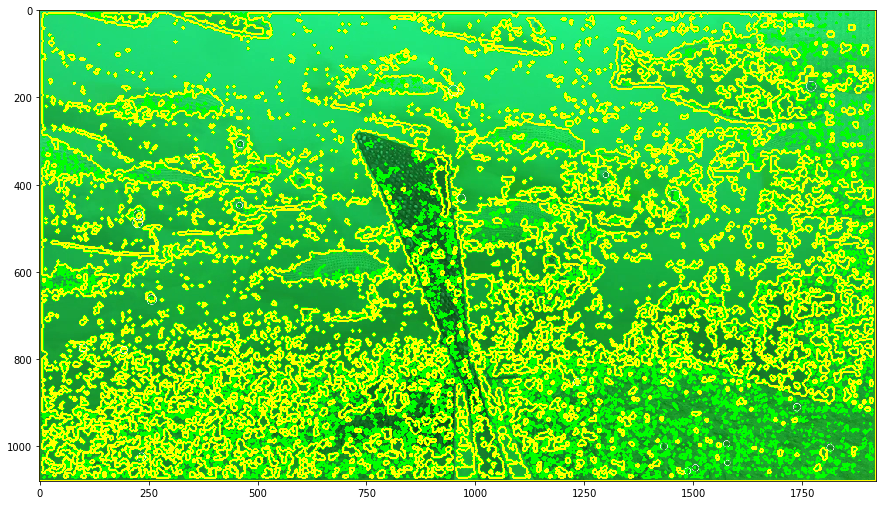

True

In [350]:
params = cv2.SimpleBlobDetector_Params()
     
# Change thresholds
params.minThreshold = 50;
params.maxThreshold = 255;

# Filter by Area.
params.filterByArea = True
params.minArea = 120

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.5

# Filter by Inertia
params.filterByInertia =False
params.minInertiaRatio = 0.5

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(smooth_equ)
im_with_keypoints = cv2.drawKeypoints(orig_img, keypoints, np.array([]), (255,255,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
display_img = cv2.cvtColor(im_with_keypoints,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(display_img)
plt.show()
cv2.imwrite("output1.jpg",im_with_keypoints )

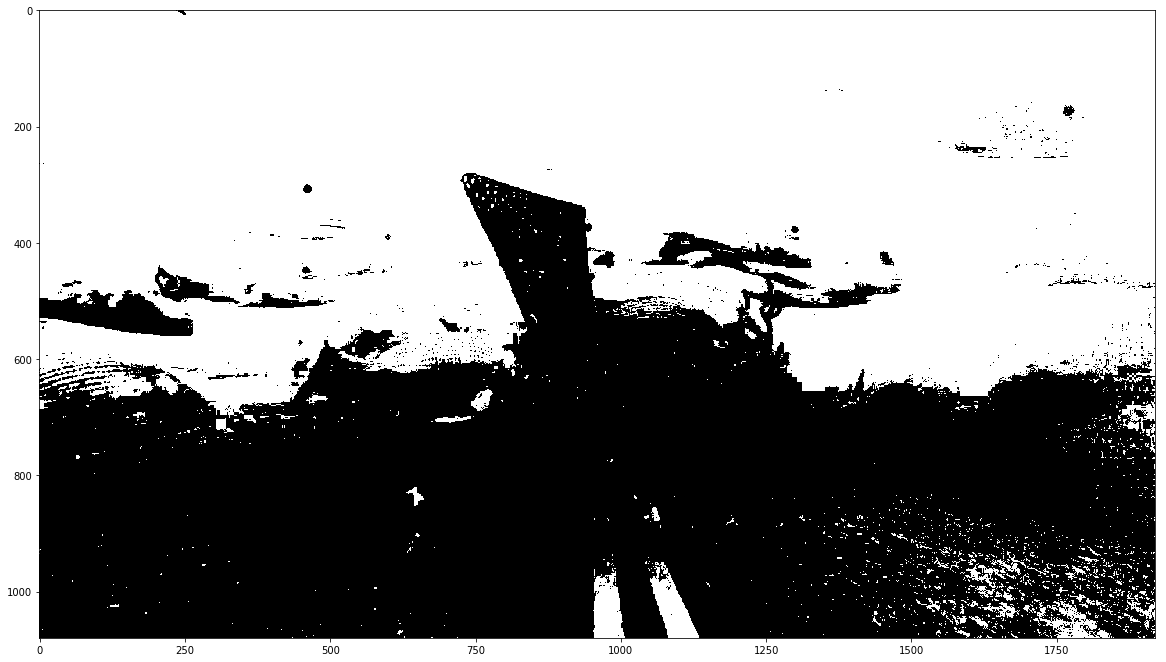

In [77]:

        
ret, thresh = cv2.threshold(gray_image, 110, 255, 0)
display_img = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(display_img)
plt.show()

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',display_img)


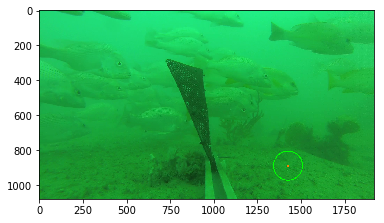

In [32]:
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1.2, 10)
        
#if circles is not None:
#convert the (x, y) coordinates and radius of the circles to integers
circles = np.round(circles[0, :]).astype("int")

# loop over the (x, y) coordinates and radius of the circles
for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
    cv2.circle(orig_img, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(orig_img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

display_img = cv2.cvtColor(orig_img,cv2.COLOR_BGR2RGB)
plt.imshow(display_img)
plt.show()

In [69]:




while(True):
    cou = cou + 1
    ret, frame = cap.read()  
    
    #cv2.imshow('frame',fgmask)
    if ret==True:
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        smoothedFrame = cv2.GaussianBlur(gray_image,(5,5),0)
        
        ret, thresh = cv2.threshold(smoothedFrame, 110, 255, 0)
        
        #circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1.2, 10)
        
        #if circles is not None:
            # convert the (x, y) coordinates and radius of the circles to integers
         #   circles = np.round(circles[0, :]).astype("int")
 
            # loop over the (x, y) coordinates and radius of the circles
          #  for (x, y, r) in circles:
                # draw the circle in the output image, then draw a rectangle
                # corresponding to the center of the circle
             #   cv2.circle(frame, (x, y), r, (0, 255, 0), 4)
              #  cv2.rectangle(frame, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
 
        
        # get contours
        #im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        #im3 = cv2.drawContours(im2, contours, -1, (0, 255, 0), 3)
        
        #diff = cv2.absdiff(smoothedFrame, gray_image)
        
        #thresh = 2
        #maxValue = 255
 
        # Basic threshold example
       # th, dst = cv2.threshold(diff, thresh, maxValue, cv2.THRESH_BINARY);
        
      # kernel = np.ones((5,5), np.uint8)

        
        #img_dilation = cv2.dilate(thresh, kernel, iterations=1)
        #img_er = cv2.erode(thresh, kernel, iterations=1)
        #keypoints = detector.detect(gray_image)
        
        #for kp in keypoints:
          
           # cv2.circle(frame, (int(kp.pt[0]), int(kp.pt[1])), int(kp.size), (0, 0, 255))
        
       # fgmask = fgbg.apply(im2)
        #keypoints = detector.detect(fgmask)
        #im_with_keypoints = cv2.drawKeypoints(frame, keypoints, np.array([]), (255,255,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        # write the flipped frame
        #out.write(frame)
        cv2.imwrite(outputTemp + '/IMG_' + '{0:0{width}}'.format(cou, width=5) + '.bmp', thresh)
        
        if cou > 200:
            break
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
#out.release()
cv2.destroyAllWindows()
    
   

In [70]:
os.chdir(ffmpegPath)
subprocess.call(['ffmpeg', '-y', '-r', '25', '-start_number', '0', '-i', outputTemp + '/IMG_%05d.bmp', '-vcodec','libx264','-pix_fmt', 'yuv420p', outputVid])
os.system("start "+ outputVid)

0